# Testing the Caldeira-Legget master equation

In [1]:
from split_op_wigner_bloch import SplitOpWignerBloch
from caldeira_legget_master_eq import CaldeiraLeggetMEq, np
import matplotlib.pyplot as plt
from wigner_normalize import WignerSymLogNorm, WignerNormalize

In [2]:
# parameters of quantum system
qsys_params = dict(
    dt=0.02,
    
    x_grid_dim=512,
    x_amplitude=20.,

    p_grid_dim=512,
    p_amplitude=20.,
    
    # kinetic energy part of the hamiltonian
    k=lambda p: 0.5 * p ** 2,
)

In [3]:
# First, let's find the ground state of the displaced quartic oscillator
initial_condition = SplitOpWignerBloch(
    # potential energy -- the displaced quartic oscillator 
    v=lambda x: 0.25 * (x-2) ** 4,
    
    # all the other parameters
    **qsys_params
).get_ground_state()

In [4]:
# initialize the propagator
gamma = 0.1

caldeira_legget_prop = CaldeiraLeggetMEq(
    # potential energy -- the quartic oscillator 
    v=lambda x: 0.25 * x ** 4,
    
    # the dephasing coefficient (for details see the source code caldeira_legget_master_eq.py)
    D=0.1,
    
    # the decal coeffcient (for details see the source code caldeira_legget_master_eq.py)
    gamma=gamma,
    
    # these functions are used for evaluating the Ehrenfest theorems
    x_rhs=lambda p: p,
    p_rhs=lambda x, p: -x ** 3 - 2. * gamma * p,
    
    # all the other parameters
    **qsys_params
)

# feed the initial condition 
caldeira_legget_prop.set_wignerfunction(initial_condition)

# propagate the state by 500 dt time steps
final_state = caldeira_legget_prop.propagate(500).copy()

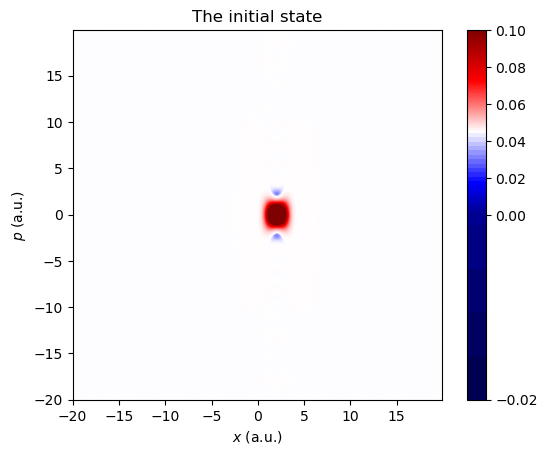

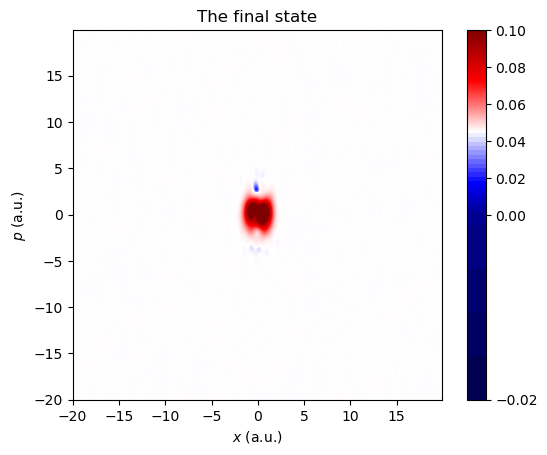

In [5]:
##############################################################################
#
#   Propagate and plot the results
#
##############################################################################
extent=[caldeira_legget_prop.x.min(), caldeira_legget_prop.x.max(), 
        caldeira_legget_prop.p.min(), caldeira_legget_prop.p.max()]

# save common plotting parameters
plot_params = dict(
    origin='lower',
    extent=extent,
    aspect=(extent[1] - extent[0]) / (extent[-1] - extent[-2]),
    cmap='seismic',
    # The logarithmic color scale DOES NOT WORK in the 2025 version of Matplotlib
    # norm=WignerSymLogNorm(linthresh=1e-13, vmin=-0.01, vmax=0.1)
    # if you want to plot in linear scale uncomment line below
    norm=WignerNormalize(vmin=-0.01, vmax=0.1)
)

plt.title("The initial state")
plt.imshow(initial_condition, **plot_params)
plt.colorbar()
plt.xlabel('$x$ (a.u.)')
plt.ylabel('$p$ (a.u.)')
plt.show()

plt.title("The final state")

plt.imshow(final_state, **plot_params)
plt.colorbar()
plt.xlabel('$x$ (a.u.)')
plt.ylabel('$p$ (a.u.)')
plt.show()

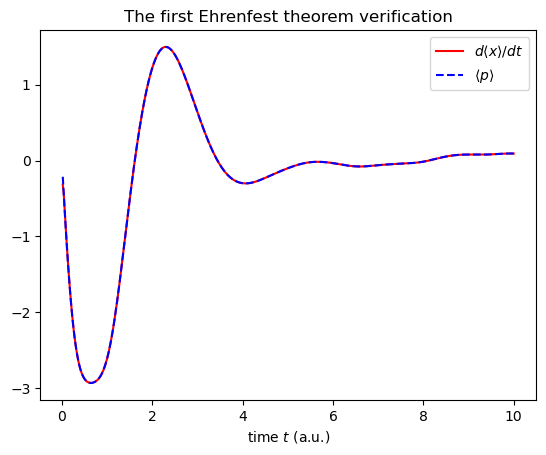

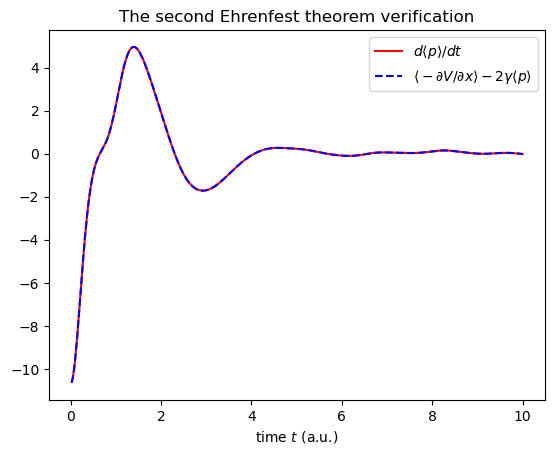

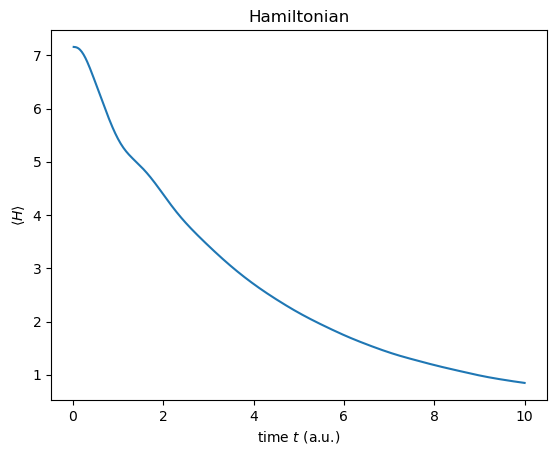

In [6]:
#################################################################
#
# Plot the Ehrenfest theorems 
#
#################################################################

# generate time step grid
dt = caldeira_legget_prop.dt
times = caldeira_legget_prop.times

plt.title("The first Ehrenfest theorem verification")

plt.plot(
    times, 
    np.gradient(caldeira_legget_prop.x_average, dt), 
    'r-', 
    label='$d\\langle x \\rangle/dt$'
)
plt.plot(times, caldeira_legget_prop.x_average_rhs, 'b--', label='$\\langle p \\rangle$')

plt.legend()
plt.xlabel('time $t$ (a.u.)')
plt.show()

plt.title("The second Ehrenfest theorem verification")
plt.plot(
    times, 
    np.gradient(caldeira_legget_prop.p_average, dt), 
    'r-', 
    label='$d\\langle p \\rangle/dt$'
)
plt.plot(
    times, 
    caldeira_legget_prop.p_average_rhs, 
    'b--', 
    label='$\\langle -\\partial V/\\partial x \\rangle - 2\\gamma \\langle p \\rangle$'
)

plt.legend()
plt.xlabel('time $t$ (a.u.)')
plt.show()

plt.title('Hamiltonian')
plt.plot(times, caldeira_legget_prop.hamiltonian_average)
plt.xlabel('time $t$ (a.u.)')
plt.ylabel('$\\langle H \\rangle$')

plt.show()